In [1]:
import pandas as pd

# Carga del archivo CSV
ruta_archivo = 'nuevo_archivo_final_dataset_con_subestacion.csv'
df = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame para una rápida exploración
print(df.head())

# Ver la información del DataFrame para conocer los tipos de datos
print(df.info())

# Mostrar estadísticas descriptivas de las columnas numéricas
print(df.describe())


          id                     fecha     consumo  flap_de_calidad  \
0  177760211  2019-02-01 00:00:00-0300  -51.381349                1   
1  395102211  2019-02-01 00:00:00-0300 -171.906310                1   
2  395684211  2019-02-01 00:00:00-0300   94.762790                1   
3  397670211  2019-02-01 00:00:00-0300   47.114733                1   
4  397693211  2019-02-01 00:00:00-0300   59.313975                1   

   promedio_horas         nombre_interruptor   año  mes  dia  hora  \
0               4    AJAHUEL   110  H1     P  2019    2    1     0   
1               4  BUIN      110  HT1    MTP  2019    2    1     0   
2               4    BUIN      110  H2     P  2019    2    1     0   
3               4    LOSALME   110  H1     P  2019    2    1     0   
4               4    LOSALME   110  H3     P  2019    2    1     0   

  sub_estacion  
0      AJAHUEL  
1         BUIN  
2         BUIN  
3      LOSALME  
4      LOSALME  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [2]:
# Verificar valores faltantes
print(df.isnull().sum())

# Manejar valores faltantes (por ejemplo, eliminar filas con datos faltantes o llenar con un valor)
df = df.dropna()  # Elimina filas con valores faltantes

# Convertir columnas categóricas a numéricas utilizando encoding
# Por ejemplo, si hay una columna llamada 'nombre_interruptor' que es categórica:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['nombre_interruptor'] = encoder.fit_transform(df['nombre_interruptor'])

# Realizar otras conversiones de datos similares si es necesario


id                    0
fecha                 0
consumo               0
flap_de_calidad       0
promedio_horas        0
nombre_interruptor    0
año                   0
mes                   0
dia                   0
hora                  0
sub_estacion          0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

# Seleccionar características (X) y etiquetas (y)
X = df.drop(['consumo'], axis=1)  # Ajusta según la variable objetivo
y = df['consumo']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
import pandas as pd

# Ruta del archivo CSV
ruta_archivo = 'nuevo_archivo_final_dataset_con_subestacion.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Mostrar los nombres de las columnas
print("Nombres de las columnas:", df.columns)


          id                     fecha     consumo  flap_de_calidad  \
0  177760211  2019-02-01 00:00:00-0300  -51.381349                1   
1  395102211  2019-02-01 00:00:00-0300 -171.906310                1   
2  395684211  2019-02-01 00:00:00-0300   94.762790                1   
3  397670211  2019-02-01 00:00:00-0300   47.114733                1   
4  397693211  2019-02-01 00:00:00-0300   59.313975                1   

   promedio_horas         nombre_interruptor   año  mes  dia  hora  \
0               4    AJAHUEL   110  H1     P  2019    2    1     0   
1               4  BUIN      110  HT1    MTP  2019    2    1     0   
2               4    BUIN      110  H2     P  2019    2    1     0   
3               4    LOSALME   110  H1     P  2019    2    1     0   
4               4    LOSALME   110  H3     P  2019    2    1     0   

  sub_estacion  
0      AJAHUEL  
1         BUIN  
2         BUIN  
3      LOSALME  
4      LOSALME  
Nombres de las columnas: Index(['id', 'fecha', 'co

In [5]:
print("Valores faltantes en cada columna:")
print(df.isnull().sum())

# Puedes decidir cómo manejar los valores faltantes, por ejemplo, eliminarlos
df = df.dropna()


Valores faltantes en cada columna:
id                    0
fecha                 0
consumo               0
flap_de_calidad       0
promedio_horas        0
nombre_interruptor    0
año                   0
mes                   0
dia                   0
hora                  0
sub_estacion          0
dtype: int64


In [6]:
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce', utc=True)


In [7]:
# Convertir la zona horaria a UTC y eliminarla si es necesario
df['fecha'] = df['fecha'].dt.tz_convert('UTC')

# Separar los componentes de fecha
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['día'] = df['fecha'].dt.day
df['hora'] = df['fecha'].dt.hour

# Eliminar la columna `fecha` original si ya no es necesaria
df = df.drop('fecha', axis=1)


In [8]:
from sklearn.preprocessing import LabelEncoder

# Convertir columnas categóricas a numéricas
encoder = LabelEncoder()

# Convertir la columna 'flap_de_calidad'
df['flap_de_calidad'] = encoder.fit_transform(df['flap_de_calidad'])

# Convertir la columna 'nombre_interruptor'
df['nombre_interruptor'] = encoder.fit_transform(df['nombre_interruptor'])

# Convertir la columna 'sub_estacion'
df['sub_estacion'] = encoder.fit_transform(df['sub_estacion'])


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Cargar datos
df = pd.read_csv('nuevo_archivo_final_dataset_con_subestacion.csv')

# Convertir fechas a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Columnas de características (features) y objetivo (target)
features = ['año', 'mes', 'dia', 'hora']
target = 'consumo'

# Convertir características numéricas a variables numéricas
numeric_features = features

# Inicializar resultados
resultados = []

# Iterar por cada subestación
for subestacion, grupo in df.groupby('sub_estacion'):
    print(f"\nEntrenando modelos para subestación: {subestacion}")
    
    # Seleccionar características y objetivo para el grupo actual
    X = grupo[features]
    y = grupo[target]
    
    # Transformar características numéricas y estandarizarlas
    column_transformer = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features)
        ])
    X_transformed = column_transformer.fit_transform(X)
    
    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
    
    # Definir modelos
    modelos = {
        'Regresión Lineal': LinearRegression(),
        'Árbol de Decisión': DecisionTreeRegressor(),
        'RNN': Sequential([
            SimpleRNN(32, input_shape=(X_train.shape[1], 1), return_sequences=False),
            Dense(1)
        ])
    }
    
    # Entrenar y evaluar modelos
    for nombre, modelo in tqdm(modelos.items(), desc="Entrenando modelos", unit="modelo"):
        print(f"\nEntrenando {nombre} para subestación: {subestacion}...")
        
        # Entrenar modelo
        if nombre == 'RNN':
            # Convertir datos a 3D para RNN
            X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
            X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
            
            # Compilar y entrenar el modelo RNN
            modelo.compile(loss='mean_squared_error', optimizer='adam')
            modelo.fit(X_train_rnn, y_train, epochs=20, batch_size=32, verbose=1)
            
            # Predecir
            y_pred = modelo.predict(X_test_rnn)
            
            # Aplanar `y_pred` para tener una dimensión
            y_pred = np.squeeze(y_pred)
            
        else:
            # Entrenar el modelo
            modelo.fit(X_train, y_train)
            
            # Predecir
            y_pred = modelo.predict(X_test)
            
        # Calcular métricas
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Agregar resultados
        resultados.append({
            'Subestación': subestacion,
            'Modelo': nombre,
            'MAE': mae,
            'MSE': mse,
            'R2': r2
        })

        # Mostrar los resultados de cada modelo
        print(f"\nResultados para {nombre} en subestación {subestacion}:")
        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"R2: {r2}")
        print()

# Mostrar resultados finales
df_resultados = pd.DataFrame(resultados)
print("\nResultados finales:")
print(df_resultados)


C:\Users\YASITCOMPUTER\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Entrenando modelos para subestación: AJAHUEL


Entrenando modelos:   0%|          | 0/3 [00:00<?, ?modelo/s]


Entrenando Regresión Lineal para subestación: AJAHUEL...

Resultados para Regresión Lineal en subestación AJAHUEL:
MAE: 54.052642776824484
MSE: 3305.6188194942774
R2: 0.017178933015870146


Entrenando Árbol de Decisión para subestación: AJAHUEL...


Entrenando modelos:  67%|██████▋   | 2/3 [00:00<00:00,  4.47modelo/s]


Resultados para Árbol de Decisión en subestación AJAHUEL:
MAE: 70.47888230067987
MSE: 5973.193225701074
R2: -0.7759398345523814


Entrenando RNN para subestación: AJAHUEL...
Epoch 1/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 3653.4592
Epoch 2/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 3298.7417
Epoch 3/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 3265.9131
Epoch 4/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 3266.6150
Epoch 5/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 3259.7686
Epoch 6/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 3283.2979
Epoch 7/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 3255.2080
Epoch 8/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 3247.7908
Epoch 9/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 3266.8955
Epoch 10/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 3258.3127
Epoch 11/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 3252.6152
Epoch 12/20
5752/5752 ━━━━━━━━━

Entrenando modelos: 100%|██████████| 3/3 [02:08<00:00, 42.67s/modelo]
C:\Users\YASITCOMPUTER\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Resultados para RNN en subestación AJAHUEL:
MAE: 53.97041840040502
MSE: 3226.5249327239453
R2: 0.04069499534257015


Entrenando modelos para subestación: BUIN


Entrenando modelos:   0%|          | 0/3 [00:00<?, ?modelo/s]


Entrenando Regresión Lineal para subestación: BUIN...

Resultados para Regresión Lineal en subestación BUIN:
MAE: 67.48747960494106
MSE: 9180.750295315765
R2: -2.4318377463083962e-05


Entrenando Árbol de Decisión para subestación: BUIN...


Entrenando modelos:  67%|██████▋   | 2/3 [00:00<00:00,  3.59modelo/s]


Resultados para Árbol de Decisión en subestación BUIN:
MAE: 92.34714598749099
MSE: 15146.840579346623
R2: -0.6498879109762594


Entrenando RNN para subestación: BUIN...
Epoch 1/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 9131.0830
Epoch 2/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 9267.9102
Epoch 3/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 9141.8438
Epoch 4/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 9129.4150
Epoch 5/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 9192.5166
Epoch 6/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 9218.4795
Epoch 7/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 9182.9189
Epoch 8/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 9173.8408
Epoch 9/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 9184.9023
Epoch 10/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 993us/step - loss: 9208.2959
Epoch 11/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 9191.7256
Epoch 12/20
7189/7189 ━━━━━━━━━━━━

Entrenando modelos: 100%|██████████| 3/3 [02:31<00:00, 50.55s/modelo]
C:\Users\YASITCOMPUTER\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Resultados para RNN en subestación BUIN:
MAE: 67.51301984296688
MSE: 9181.051863317512
R2: -5.7167036416894135e-05


Entrenando modelos para subestación: CHENA


Entrenando modelos:   0%|          | 0/3 [00:00<?, ?modelo/s]


Entrenando Regresión Lineal para subestación: CHENA...

Resultados para Regresión Lineal en subestación CHENA:
MAE: 92.96362734627377
MSE: 14893.724663569128
R2: 0.0015641498638000462


Entrenando Árbol de Decisión para subestación: CHENA...


Entrenando modelos:  67%|██████▋   | 2/3 [00:00<00:00,  4.20modelo/s]


Resultados para Árbol de Decisión en subestación CHENA:
MAE: 119.56434741803628
MSE: 24350.16678202259
R2: -0.6323706810181382


Entrenando RNN para subestación: CHENA...
Epoch 1/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 8s 1000us/step - loss: 15246.2344
Epoch 2/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 14994.4863
Epoch 3/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 14882.3945
Epoch 4/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 15024.5420
Epoch 5/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 14923.7773
Epoch 6/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 14799.5225
Epoch 7/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 14982.9219
Epoch 8/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 14940.2178
Epoch 9/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 994us/step - loss: 14952.4990
Epoch 10/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 14953.9336
Epoch 11/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 14996.2988
Epoch 12/20
7189/7

Entrenando modelos: 100%|██████████| 3/3 [02:31<00:00, 50.38s/modelo]
C:\Users\YASITCOMPUTER\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Resultados para RNN en subestación CHENA:
MAE: 92.8915016903986
MSE: 14880.371866206951
R2: 0.0024592860293431995


Entrenando modelos para subestación: CNAVIA


Entrenando modelos:   0%|          | 0/3 [00:00<?, ?modelo/s]


Entrenando Regresión Lineal para subestación: CNAVIA...

Resultados para Regresión Lineal en subestación CNAVIA:
MAE: 46.29480440775037
MSE: 3359.086331302478
R2: 0.009799143287582024


Entrenando Árbol de Decisión para subestación: CNAVIA...


Entrenando modelos:  67%|██████▋   | 2/3 [00:00<00:00,  2.59modelo/s]


Resultados para Árbol de Decisión en subestación CNAVIA:
MAE: 51.4937027910493
MSE: 4183.600008391493
R2: -0.23325330279470657


Entrenando RNN para subestación: CNAVIA...
Epoch 1/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 3522.0479
Epoch 2/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 3297.3999
Epoch 3/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 3308.7869
Epoch 4/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 3288.4778
Epoch 5/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 3292.7048
Epoch 6/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 3298.8792
Epoch 7/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 3272.8152
Epoch 8/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 3277.2170
Epoch 9/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 3289.7026
Epoch 10/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 3290.1104
Epoch 11/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 3286.6282


Entrenando modelos: 100%|██████████| 3/3 [04:49<00:00, 96.58s/modelo] 
C:\Users\YASITCOMPUTER\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Resultados para RNN en subestación CNAVIA:
MAE: 46.005706920166084
MSE: 3303.675248524991
R2: 0.026133377131567714


Entrenando modelos para subestación: ELSALTO


Entrenando modelos:   0%|          | 0/3 [00:00<?, ?modelo/s]


Entrenando Regresión Lineal para subestación: ELSALTO...

Resultados para Regresión Lineal en subestación ELSALTO:
MAE: 29.296145704308795
MSE: 1471.8120590413437
R2: 0.1537301575016925


Entrenando Árbol de Decisión para subestación: ELSALTO...


Entrenando modelos:  67%|██████▋   | 2/3 [00:00<00:00,  4.73modelo/s]


Resultados para Árbol de Decisión en subestación ELSALTO:
MAE: 27.896086597373966
MSE: 1403.806843123303
R2: 0.19283213591699988


Entrenando RNN para subestación: ELSALTO...
Epoch 1/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 5098.2700
Epoch 2/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1346.7319
Epoch 3/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1179.7939
Epoch 4/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1155.9053
Epoch 5/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1145.8677
Epoch 6/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1133.0626
Epoch 7/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1128.8715
Epoch 8/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1120.1874
Epoch 9/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1111.0363
Epoch 10/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1099.6377
Epoch 11/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1094.3202
Epoch 12/20
5752/5752 ━━━━━━━━

Entrenando modelos: 100%|██████████| 3/3 [02:06<00:00, 42.27s/modelo]
C:\Users\YASITCOMPUTER\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Resultados para RNN en subestación ELSALTO:
MAE: 24.679517226279458
MSE: 1081.130970281588
R2: 0.3783659195344715


Entrenando modelos para subestación: FLORIDA


Entrenando modelos:   0%|          | 0/3 [00:00<?, ?modelo/s]


Entrenando Regresión Lineal para subestación: FLORIDA...

Resultados para Regresión Lineal en subestación FLORIDA:
MAE: 25.11497091884177
MSE: 991.5661386227212
R2: 6.777593933793291e-05


Entrenando Árbol de Decisión para subestación: FLORIDA...


Entrenando modelos:  67%|██████▋   | 2/3 [00:00<00:00,  2.74modelo/s]


Resultados para Árbol de Decisión en subestación FLORIDA:
MAE: 29.2317004646361
MSE: 1322.9916155810106
R2: -0.33415401863059846


Entrenando RNN para subestación: FLORIDA...
Epoch 1/20
11503/11503 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 994.9504
Epoch 2/20
11503/11503 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 994.1575
Epoch 3/20
11503/11503 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 993.6520
Epoch 4/20
11503/11503 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 994.1564
Epoch 5/20
11503/11503 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 997.7498
Epoch 6/20
11503/11503 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 997.6850
Epoch 7/20
11503/11503 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 997.1274
Epoch 8/20
11503/11503 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 992.6187
Epoch 9/20
11503/11503 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 993.4881
Epoch 10/20
11503/11503 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 995.6578
Epoch 11/20
11503/11503 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 995.0808
Epoch 12

Entrenando modelos: 100%|██████████| 3/3 [04:11<00:00, 83.90s/modelo] 
C:\Users\YASITCOMPUTER\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Resultados para RNN en subestación FLORIDA:
MAE: 25.16013295488202
MSE: 990.5976370326532
R2: 0.00104444901362033


Entrenando modelos para subestación: LOSALME


Entrenando modelos:   0%|          | 0/3 [00:00<?, ?modelo/s]


Entrenando Regresión Lineal para subestación: LOSALME...

Resultados para Regresión Lineal en subestación LOSALME:
MAE: 24.170629777246706
MSE: 925.8962899450001
R2: 0.05623293611943392


Entrenando Árbol de Decisión para subestación: LOSALME...


Entrenando modelos:  67%|██████▋   | 2/3 [00:00<00:00,  5.10modelo/s]


Resultados para Árbol de Decisión en subestación LOSALME:
MAE: 31.033713979341137
MSE: 1556.121045008774
R2: -0.5861558207322843


Entrenando RNN para subestación: LOSALME...
Epoch 1/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 1364.6410
Epoch 2/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 911.5721
Epoch 3/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 900.4011
Epoch 4/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 894.7541
Epoch 5/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 884.5966
Epoch 6/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 891.3679
Epoch 7/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 892.1434
Epoch 8/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 891.9236
Epoch 9/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 888.3029
Epoch 10/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 891.7657
Epoch 11/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 884.7626
Epoch 12/20
5752/5752 ━━━━━━━━━━━━━━━━━━

Entrenando modelos: 100%|██████████| 3/3 [02:06<00:00, 42.30s/modelo]


Resultados para RNN en subestación LOSALME:
MAE: 23.64246971541451
MSE: 877.5830285457449
R2: 0.10547869436734514


Resultados finales:
   Subestación             Modelo         MAE           MSE        R2
0      AJAHUEL   Regresión Lineal   54.052643   3305.618819  0.017179
1      AJAHUEL  Árbol de Decisión   70.478882   5973.193226 -0.775940
2      AJAHUEL                RNN   53.970418   3226.524933  0.040695
3         BUIN   Regresión Lineal   67.487480   9180.750295 -0.000024
4         BUIN  Árbol de Decisión   92.347146  15146.840579 -0.649888
5         BUIN                RNN   67.513020   9181.051863 -0.000057
6        CHENA   Regresión Lineal   92.963627  14893.724664  0.001564
7        CHENA  Árbol de Decisión  119.564347  24350.166782 -0.632371
8        CHENA                RNN   92.891502  14880.371866  0.002459
9       CNAVIA   Regresión Lineal   46.294804   3359.086331  0.009799
10      CNAVIA  Árbol de Decisión   51.493703   4183.600008 -0.233253
11      CNAVIA         

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Cargar datos
df = pd.read_csv('nuevo_archivo_final_dataset_con_subestacion.csv')

# Convertir fechas a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Columnas de características (features) y objetivo (target)
features = ['año', 'mes', 'dia', 'hora']
target = 'consumo'

# Seleccionar las columnas de características y objetivo
X = df[features]
y = df[target]

# Convertir características numéricas a variables numéricas y estandarizarlas
numeric_features = features

column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

X_transformed = column_transformer.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Convertir los datos a la forma (batch_size, sequence_length, feature)
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Definir el modelo RNN
model = Sequential([
    SimpleRNN(32, input_shape=(X_train_rnn.shape[1], 1)),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))

# Graficar el loss versus epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss (Entrenamiento)')
plt.plot(history.history['val_loss'], label='Loss (Validación)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


Epoch 1/20


C:\Users\YASITCOMPUTER\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36505/56075 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 5511.7905

KeyboardInterrupt: 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Cargar datos
df = pd.read_csv('nuevo_archivo_final_dataset_con_subestacion.csv')

# Convertir fechas a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Columnas de características (features) y objetivo (target)
features = ['año', 'mes', 'dia', 'hora']
target = 'consumo'

# Seleccionar las columnas de características y objetivo
X = df[features]
y = df[target]

# Convertir características numéricas a variables numéricas y estandarizarlas
numeric_features = features

column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

X_transformed = column_transformer.fit_transform(X)

# Añadir la subestación a los datos para agruparlos por subestación
df['X_transformed'] = list(X_transformed)
df['y'] = y

# Agrupar los datos por subestación
grupos = df.groupby('sub_estacion')

# Inicializar un diccionario para guardar los historiales de entrenamiento
histories = {}

# Entrenar un modelo RNN para cada subestación
for subestacion, grupo in grupos:
    print(f"Entrenando RNN para subestación: {subestacion}...")
    
    # Obtener X y y para la subestación actual
    X_sub = np.array(list(grupo['X_transformed']))
    y_sub = grupo['y']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)
    
    # Convertir los datos a la forma (batch_size, sequence_length, feature)
    X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Definir el modelo RNN
    model = Sequential([
        SimpleRNN(32, input_shape=(X_train_rnn.shape[1], 1)),
        Dense(1)
    ])
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenar el modelo
    history = model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))
    
    # Guardar el historial de entrenamiento para la subestación
    histories[subestacion] = history

# Graficar el loss versus epochs para cada subestación
plt.figure(figsize=(12, 8))
for subestacion, history in histories.items():
    plt.plot(history.history['loss'], label=f'Loss (Entrenamiento) - {subestacion}')
    plt.plot(history.history['val_loss'], label=f'Loss (Validación) - {subestacion}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs por Subestación')
plt.legend()
plt.show()


KeyError: 'subestacion'

In [12]:
print(df.columns)


Index(['id', 'fecha', 'consumo', 'flap_de_calidad', 'promedio_horas',
       'nombre_interruptor', 'año', 'mes', 'dia', 'hora', 'sub_estacion',
       'X_transformed', 'y'],
      dtype='object')


Entrenando RNN para subestación: AJAHUEL...
Epoch 1/20


C:\Users\YASITCOMPUTER\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5752/5752 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 3630.2693 - val_loss: 3274.7751
Epoch 2/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 3275.4385 - val_loss: 3247.2468
Epoch 3/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 3264.3638 - val_loss: 3243.6643
Epoch 4/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 3264.6997 - val_loss: 3237.2649
Epoch 5/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 3248.4048 - val_loss: 3240.1133
Epoch 6/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 3273.4668 - val_loss: 3234.5637
Epoch 7/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 3257.5452 - val_loss: 3239.0205
Epoch 8/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 3252.2239 - val_loss: 3235.8374
Epoch 9/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 3252.9226 - val_loss: 3232.3860
Epoch 10/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 3254.2454 - val_loss: 3231.5173
Epoch 11/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 3249.62

12941/12941 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 3294.4126 - val_loss: 3322.8347
Epoch 4/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 3285.7808 - val_loss: 3317.3130
Epoch 5/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 3295.3660 - val_loss: 3315.9177
Epoch 6/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 3294.8672 - val_loss: 3314.1804
Epoch 7/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 3276.0579 - val_loss: 3312.7622
Epoch 8/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 3282.0249 - val_loss: 3311.7542
Epoch 9/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 3290.3479 - val_loss: 3315.0872
Epoch 10/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 3284.1440 - val_loss: 3311.4319
Epoch 11/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 3289.2131 - val_loss: 3309.6526
Epoch 12/20
12941/12941 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 3279.9197 - val_loss: 3312.5752
Epoch 13/20
12941/12941 ━━━━━━━━━━━━━━

5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 891.4070 - val_loss: 885.3097
Epoch 6/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 893.6816 - val_loss: 884.4472
Epoch 7/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 885.5574 - val_loss: 882.2976
Epoch 8/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 891.8016 - val_loss: 880.9788
Epoch 9/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 886.4285 - val_loss: 881.6456
Epoch 10/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 884.2724 - val_loss: 878.2316
Epoch 11/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 882.8506 - val_loss: 878.8879
Epoch 12/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 882.1701 - val_loss: 880.1550
Epoch 13/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 882.8314 - val_loss: 875.6929
Epoch 14/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 883.7565 - val_loss: 877.0148
Epoch 15/20
5752/5752 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 883.7839 - val_loss: 87

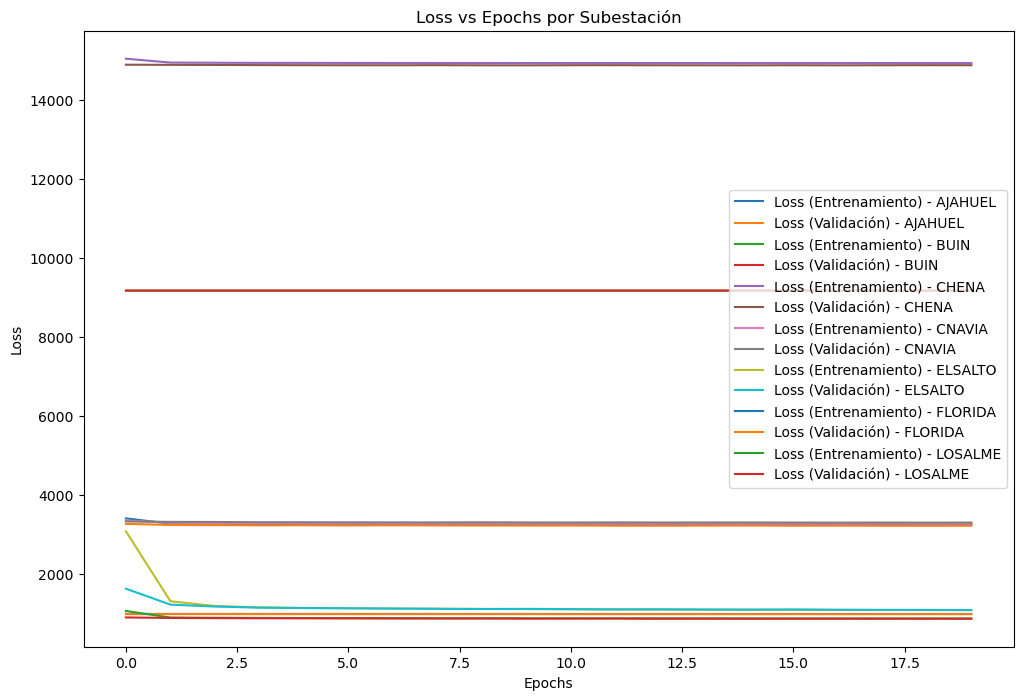

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Cargar datos
df = pd.read_csv('nuevo_archivo_final_dataset_con_subestacion.csv')

# Convertir fechas a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Columnas de características (features) y objetivo (target)
features = ['año', 'mes', 'dia', 'hora']
target = 'consumo'

# Seleccionar las columnas de características y objetivo
X = df[features]
y = df[target]

# Convertir características numéricas a variables numéricas y estandarizarlas
numeric_features = features

column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

X_transformed = column_transformer.fit_transform(X)

# Añadir la subestación a los datos para agruparlos por subestación
df['X_transformed'] = list(X_transformed)
df['y'] = y

# Agrupar los datos por subestación
grupos = df.groupby('sub_estacion')

# Inicializar un diccionario para guardar los historiales de entrenamiento
histories = {}

# Entrenar un modelo RNN para cada subestación
for subestacion, grupo in grupos:
    print(f"Entrenando RNN para subestación: {subestacion}...")
    
    # Obtener X y y para la subestación actual
    X_sub = np.array(list(grupo['X_transformed']))
    y_sub = grupo['y']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)
    
    # Convertir los datos a la forma (batch_size, sequence_length, feature)
    X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Definir el modelo RNN
    model = Sequential([
        SimpleRNN(32, input_shape=(X_train_rnn.shape[1], 1)),
        Dense(1)
    ])
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenar el modelo
    history = model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))
    
    # Guardar el historial de entrenamiento para la subestación
    histories[subestacion] = history

# Graficar el loss versus epochs para cada subestación
plt.figure(figsize=(12, 8))
for subestacion, history in histories.items():
    plt.plot(history.history['loss'], label=f'Loss (Entrenamiento) - {subestacion}')
    plt.plot(history.history['val_loss'], label=f'Loss (Validación) - {subestacion}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs por Subestación')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('nuevo_archivo_final_dataset_con_subestacion.csv')

# Convertir fechas a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Columnas de características (features) y objetivo (target)
features = ['año', 'mes', 'dia', 'hora']
target = 'consumo'

# Seleccionar las columnas de características y objetivo
X = df[features]
y = df[target]

# Convertir características numéricas a variables numéricas y estandarizarlas
numeric_features = features
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

X_transformed = column_transformer.fit_transform(X)

# Convertir el problema de regresión a un problema de clasificación
# Aquí se asume que quieres clasificar el consumo en "bajo" o "alto".
# Puedes modificar este umbral según tus necesidades.
umbral = y.mean()
y_clasificacion = (y > umbral).astype(int)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_clasificacion, test_size=0.2, random_state=42)

# Definir el modelo de clasificación (puedes cambiar a cualquier otro modelo de clasificación)
modelo = SVC(probability=True)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Calcular matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Imprimir matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)

# Graficar curva ROC
fpr, tpr, umbrales = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Imprimir informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


In [ ]:
pip install shap

In [ ]:
pip install shap

In [ ]:
!pip install shap

In [ ]:
import numpy as np
import shap
import tensorflow as tf
from tensorflow.keras.models import load_model

# Cargar el modelo RNN desde un archivo
# Supongamos que el modelo está guardado en un archivo llamado 'rnn_model.h5'
model = load_model('rnn_model.h5')

# Datos de prueba X_test
# Asegúrate de tener los datos de prueba preprocesados de la misma manera que los datos de entrenamiento
# Aquí se asume que `X_test` ya está disponible y preprocesado

# Convertir los datos de prueba a la forma (batch_size, sequence_length, feature) si es necesario
# Esto es necesario porque el modelo RNN espera datos en esta forma
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Hacer predicciones utilizando el modelo RNN
predicciones = model.predict(X_test_rnn)

# Visualizar las predicciones
print("Predicciones del modelo RNN:")
print(predicciones)

# Interpretación usando SHAP

# Crear un objeto Explainer de SHAP para el modelo
# SHAP requiere una muestra de datos de entrada para definir un modelo de fondo
explainer = shap.Explainer(model, X_test_rnn)

# Calcular los valores de SHAP para las predicciones del modelo en los datos de prueba
shap_values = explainer(X_test_rnn)

# Visualizar un resumen de los valores de SHAP
# Esto muestra cómo cada característica influye en las predicciones del modelo
shap.summary_plot(shap_values, X_test_rnn)

# Visualizar los valores de SHAP para una predicción específica (puedes cambiar el índice)
index = 0  # Índice de la predicción que quieres visualizar

# Visualizar el valor de SHAP para una predicción específica
shap.force_plot(shap_values[index])